## Notebook for prepping training data from IBIS cubes!

In [1]:
import numpy as np
import sparsetools as sp
import imtools as im #in the STiC example folder
import matplotlib.pyplot as plt 
from astropy.io import fits

In [2]:
#imodel1 = sp.model("c:/Data/QS_inversions/atmosout_IBIS_data_inversion_patch_39_c2.nc")
#imodel2 = sp.model("c:/Data/QS_inversions/atmosout_IBIS_data_inversion_patch_122_c2.nc")
#imodel3 = sp.model("c:/Data/QS_inversions/atmosout_IBIS_data_inversion_patch_165_c2.nc")
#imodel4 = sp.model("c:/Data/QS_inversions/atmosout_IBIS_data_inversion_patch_185_c2.nc")
imodel = sp.model("/home/milic/data/sst_sunspot/atmosout_final_mosaic_NaICaII_newcalib_092244_NNtraining.nc")


model::read: atmos type -> depth-stratified
model::read: nx=464, ny=280, ndep=14, nt=1
model::setSize: nx = 464, ny = 280, ndep = 14, nt = 1


In [3]:
# Nodes positions: 

# nodes_temp = -4.0, -3.5, -3.0, -2.5, -1.8, -1.0, 0.0, 0.8
# nodes_vlos = -4.0, -3.0, -2.0, -1.0, 0
# nodes_vturb = -4.0, -3.0, -2.0, -1.0, 0

In [4]:
#temperature = np.concatenate((imodel1.temp[0,], imodel2.temp[0,], imodel3.temp[0,], imodel4.temp[0,]),axis=1)
#vlos = np.concatenate((imodel1.vlos[0,], imodel2.vlos[0,], imodel3.vlos[0,], imodel4.vlos[0,]), axis=1) 
#vturb = np.concatenate((imodel1.vturb[0,], imodel2.vturb[0,], imodel3.vturb[0,], imodel4.vturb[0,]), axis=1)
#cmass = imodel1.cmass[0,0,0,:] # the cmass array is the same for every pixel
#temperature.shape

In [5]:
temperature = imodel.temp[0,]
vlos = imodel.vlos[0,]
vturb = imodel.vturb[0,]
ltau = imodel.ltau[0,0,0]

In [6]:
print(ltau)

[-7.         -6.39622641 -5.79245281 -5.18867922 -4.58490562 -3.98113203
 -3.37735844 -2.77358484 -2.16981125 -1.56603777 -0.96226418 -0.35849056
  0.24528302  0.8490566 ]


In [7]:
inodes_temp = np.array([3, 5, 7, 9, 12])
inodes_vlos = np.array([3, 5, 7, 9, 12])
inodes_vturb = np.array([3, 7, 12])

#print (cmass[inodes_temp])

In [8]:
tempnodes = temperature[:,:,inodes_temp]
vlosnodes = vlos[:,:,inodes_vlos]
vturbnodes = vturb[:,:,inodes_vturb]

In [9]:
temphdu = fits.PrimaryHDU(tempnodes)
vloshdu = fits.ImageHDU(vlosnodes)
vturbhdu = fits.ImageHDU(vturbnodes)
mylist = fits.HDUList([temphdu, vloshdu, vturbhdu])
mylist.writeto("full_training_set_out.fits", overwrite=True)


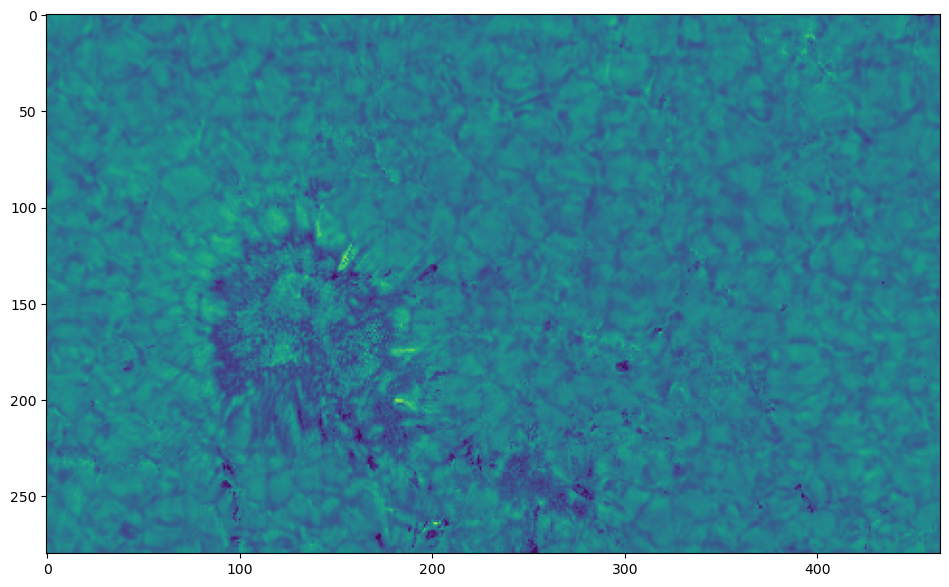

In [10]:
plt.figure(figsize=[12,7])
plt.imshow(temperature[:,:,-1])

In [11]:
# Same for the spectra:

In [12]:
#sp1 = sp.profile("C:/Data/QS_inversions/IBIS_data_inversion_QS_patch_39.nc") 
#sp2 = sp.profile("C:/Data/QS_inversions/IBIS_data_inversion_QS_patch_122.nc") 
#sp3 = sp.profile("C:/Data/QS_inversions/IBIS_data_inversion_QS_patch_165.nc") 
#sp4 = sp.profile("C:/Data/QS_inversions/IBIS_data_inversion_QS_patch_185.nc") 
sp = sp.profile("/home/milic/data/sst_sunspot/final_mosaic_NaICaII_newcalib_092244_NNtraining.nc")

profile::setsize: nx=464, ny=280, nw=21, ns=4, nt=1
['profiles' 'wav' 'weights' 'pixel_weights']
profile::read: [profiles][wav][weights][pixel_weights]


In [13]:
#stokes1 = sp1.dat[0,]
#stokes2 = sp2.dat[0,]
#stokes3 = sp3.dat[0,]
#stokes4 = sp4.dat[0,]
stokes = sp.dat[0,]

In [14]:
#stokes_full = np.concatenate((stokes1, stokes2, stokes3, stokes4),axis=1)
#stokes_full.shape
stokes_full = stokes

In [15]:
stokes = fits.PrimaryHDU(stokes_full)
stokes.writeto("full_training_set_in.fits",overwrite=True)

### All the same except for the validation data:

In [16]:
# Validation data?